In [0]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (12, 9), 'figure.dpi': 120})
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
from google.colab import files
files.upload()

Saving result_pilot.csv to result_pilot.csv


{'result_pilot.csv': b',Mnemonic Code,Day of Confirmation Date,Bookings,Booking Status,Week_Number,year\r\n7,NYCIK,2018-01-11,70,Cancelled,2,2018\r\n27,NYCIK,2018-01-11,40,Confirmed,2,2018\r\n43,NYCIK,2018-01-12,11,Cancelled,2,2018\r\n99,LAXWP,2018-01-12,6,Confirmed,2,2018\r\n101,LAXWP,2018-01-13,57,Confirmed,2,2018\r\n177,SFODR,2018-01-13,150,Confirmed,2,2018\r\n273,LAXWP,2018-01-13,41,Cancelled,2,2018\r\n325,NYCIK,2018-01-13,3,Confirmed,2,2018\r\n418,SFODR,2018-01-12,2,Confirmed,2,2018\r\n432,LAXWP,2018-01-14,5,Confirmed,2,2018\r\n477,NYCIK,2018-01-14,10,Cancelled,2,2018\r\n504,SFODR,2018-01-16,4,Confirmed,3,2018\r\n591,LAXWP,2018-01-15,2,Confirmed,3,2018\r\n606,NYCIK,2018-01-15,56,Cancelled,3,2018\r\n640,NYCIK,2018-01-16,39,Cancelled,3,2018\r\n711,LAXWP,2018-01-16,4,Cancelled,3,2018\r\n863,SFODR,2018-01-11,4,Confirmed,2,2018\r\n895,LAXWP,2018-01-17,2,Confirmed,3,2018\r\n896,LAXWP,2018-01-17,3,Cancelled,3,2018\r\n938,NYCIK,2018-01-12,2,Confirmed,2,2018\r\n1066,SFODR,2018-01-17,1,Conf

In [4]:
result_pilot = pd.read_csv('result_pilot.csv')
result_pilot['Mnemonic Code'] = result_pilot['Mnemonic Code'].replace({'VRB':'MIAVB', 'EPC':'MIAEP','ANG':'MIAAG','EVT':'NYCAA',
      'MSE':'NTCME','LAP':'LAXWE','HWL':'LAXWM','TMO':'SFOBC'})
result_pilot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8449 entries, 0 to 8448
Data columns (total 7 columns):
Unnamed: 0                  8449 non-null int64
Mnemonic Code               8449 non-null object
Day of Confirmation Date    8449 non-null object
Bookings                    8449 non-null int64
Booking Status              8449 non-null object
Week_Number                 8449 non-null int64
year                        8449 non-null int64
dtypes: int64(4), object(3)
memory usage: 462.1+ KB


In [5]:
result_pilot['Day of Confirmation Date'] = pd.to_datetime(result_pilot['Day of Confirmation Date'], errors='coerce')
result_pilot=result_pilot.sort_values(['Day of Confirmation Date'])
result_pilot['month_year'] = result_pilot['Day of Confirmation Date'].dt.to_period('M') 
result_pilot['Total_Bookings']=result_pilot.groupby(['Mnemonic Code','month_year','Booking Status'])['Bookings'].transform('sum')
result_pilot.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 8449 entries, 3135 to 2900
Data columns (total 9 columns):
Unnamed: 0                  8449 non-null int64
Mnemonic Code               8449 non-null object
Day of Confirmation Date    8449 non-null datetime64[ns]
Bookings                    8449 non-null int64
Booking Status              8449 non-null object
Week_Number                 8449 non-null int64
year                        8449 non-null int64
month_year                  8449 non-null period[M]
Total_Bookings              8449 non-null int64
dtypes: datetime64[ns](1), int64(5), object(2), period[M](1)
memory usage: 660.1+ KB


In [0]:
Forecast=result_pilot.drop(['Day of Confirmation Date',
       'Bookings','Week_Number','year','Unnamed: 0'], axis=1)
Forecast=Forecast.drop_duplicates()




In [7]:
Forecast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 3135 to 2758
Data columns (total 4 columns):
Mnemonic Code     320 non-null object
Booking Status    320 non-null object
month_year        320 non-null period[M]
Total_Bookings    320 non-null int64
dtypes: int64(1), object(2), period[M](1)
memory usage: 12.5+ KB


In [0]:

X=Forecast[Forecast['Mnemonic Code'].str.contains("SFODR")]
X_Confirm=X[X['Booking Status'].str.contains("Confirmed")]
X_Confirm=X_Confirm.drop(['Mnemonic Code','Booking Status'], axis=1)





In [10]:
X_Confirm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total_Bookings,40.0,243.9,157.715225,41.0,141.75,220.0,319.25,832.0


In [11]:
X_Confirm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 2935 to 2847
Data columns (total 2 columns):
month_year        40 non-null period[M]
Total_Bookings    40 non-null int64
dtypes: int64(1), period[M](1)
memory usage: 960.0 bytes


In [12]:
#MIAVB_Confirm=MIAVB_Confirm.drop_duplicates()
X_Confirm.set_index('month_year', inplace=True)
X_Confirm.head()


,Total_Bookings
month_year,
2016-01,223
2016-02,162
2016-03,180
2016-04,217
2016-05,260


**VISUALIZATION**

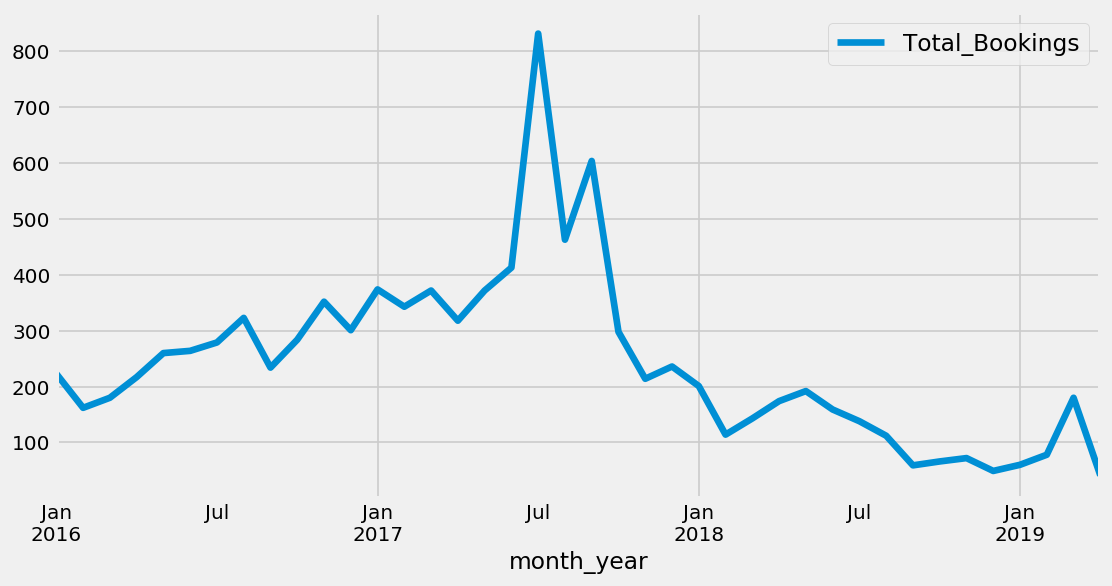

In [13]:
X_Confirm.plot(figsize=(10, 5))
plt.show()

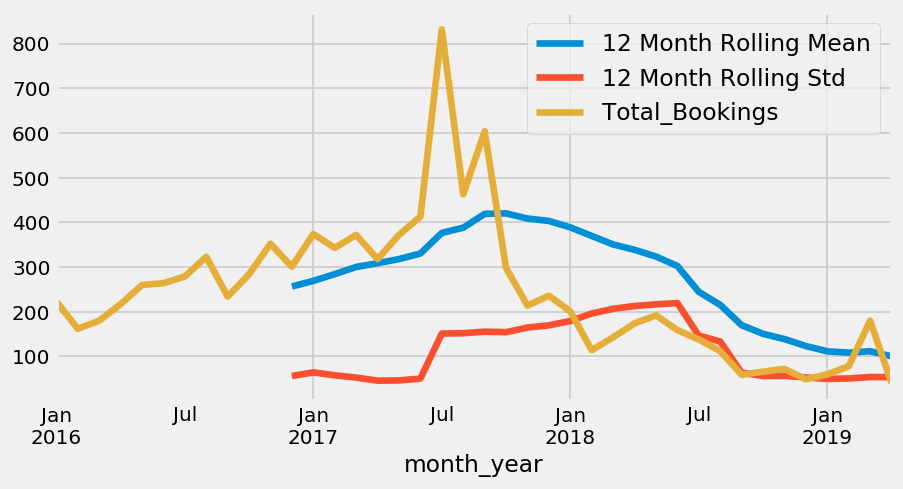

In [14]:
X_Confirm.Total_Bookings.rolling(12).mean().plot(label='12 Month Rolling Mean',figsize=(8, 4))
X_Confirm.Total_Bookings.rolling(12).std().plot(label='12 Month Rolling Std',figsize=(8, 4))
X_Confirm.Total_Bookings.plot(figsize=(8, 4))
plt.legend()

<Figure size 1440x1080 with 0 Axes>

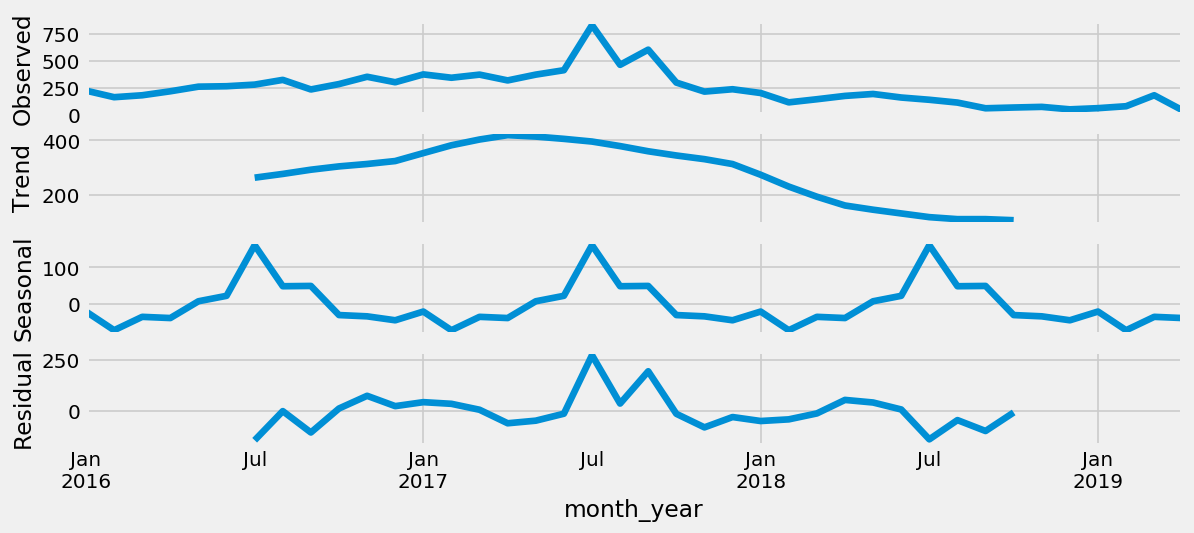

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(X_Confirm['Total_Bookings'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(10, 4)


In [0]:
from statsmodels.tsa.stattools import adfuller
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adf_check(X_Confirm['Total_Bookings'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3024938763344263
p-value : 0.6280305912558112
#Lags Used : 1
Number of Observations Used : 38
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
X_Confirm['First_order_Difference']=X_Confirm.Total_Bookings-X_Confirm.Total_Bookings.shift(1)
X_Confirm.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 40 entries, 2016-01 to 2019-04
Freq: M
Data columns (total 2 columns):
Total_Bookings            40 non-null int64
First_order_Difference    39 non-null float64
dtypes: float64(1), int64(1)
memory usage: 960.0 bytes


In [19]:
adf_check(X_Confirm['First_order_Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.758374273762577
p-value : 7.680140385398492e-17
#Lags Used : 0
Number of Observations Used : 38
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


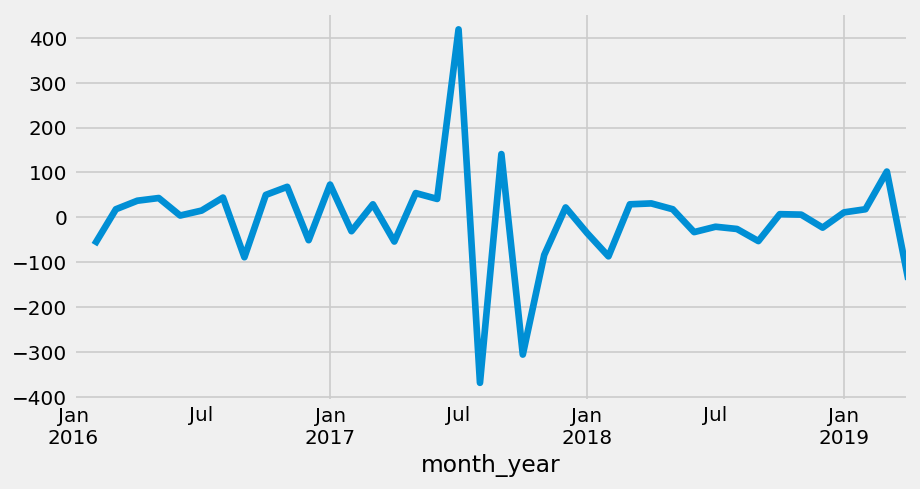

In [20]:
X_Confirm['First_order_Difference'].plot(figsize=(8, 4))

In [510]:
X_Confirm['Second_order_Difference']=X_Confirm.First_order_Difference-X_Confirm.First_order_Difference.shift(1)
X_Confirm.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 40 entries, 2016-01 to 2019-04
Freq: M
Data columns (total 3 columns):
Total_Bookings             40 non-null int64
First_order_Difference     39 non-null float64
Second_order_Difference    38 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [511]:
adf_check(X_Confirm['Second_order_Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.212798675867393
p-value : 0.01925569203550253
#Lags Used : 9
Number of Observations Used : 28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


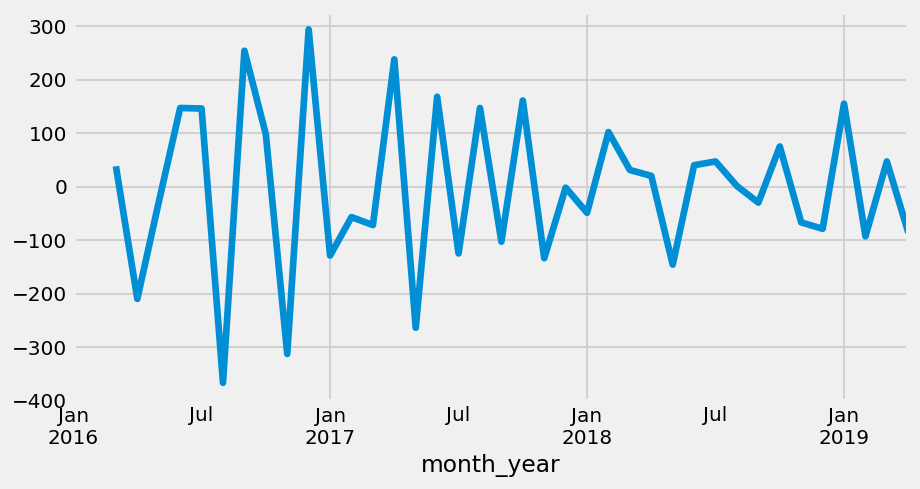

In [512]:
X_Confirm['Second_order_Difference'].plot(figsize=(8, 4))

In [21]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(X_Confirm.Total_Bookings.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(X_Confirm.Total_Bookings.diff().dropna(), ax=axes[1])

plt.show()

TypeError: ignored

ValueError: ignored

<Figure size 1080x360 with 2 Axes>

**Modelling ARIMA""**

In [0]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [0]:

df=X_Confirm.Total_Bookings[:'2018-12']
df=pd.DataFrame(df)

In [69]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.Total_Bookings,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}4 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 4)
SARIMAX: (0, 0, 1) x (0, 1, 0, 4)
SARIMAX: (0, 1, 0) x (0, 1, 1, 4)
SARIMAX: (0, 1, 0) x (1, 0, 0, 4)
ARIMA(0, 0, 0)x(0, 0, 0, 4)4 - AIC:501.74976850981767
ARIMA(0, 0, 0)x(0, 0, 1, 4)4 - AIC:432.3744839494994
ARIMA(0, 0, 0)x(0, 1, 0, 4)4 - AIC:413.1932242974406
ARIMA(0, 0, 0)x(0, 1, 1, 4)4 - AIC:362.2136244882493
ARIMA(0, 0, 0)x(1, 0, 0, 4)4 - AIC:424.03086843431106
ARIMA(0, 0, 0)x(1, 0, 1, 4)4 - AIC:411.8436504875062
ARIMA(0, 0, 0)x(1, 1, 0, 4)4 - AIC:374.4712257340156
ARIMA(0, 0, 0)x(1, 1, 1, 4)4 - AIC:363.944098349345
ARIMA(0, 0, 1)x(0, 0, 0, 4)4 - AIC:466.84542617493395
ARIMA(0, 0, 1)x(0, 0, 1, 4)4 - AIC:405.42321213406063
ARIMA(0, 0, 1)x(0, 1, 0, 4)4 - AIC:395.3360291941354
ARIMA(0, 0, 1)x(0, 1, 1, 4)4 - AIC:344.0879859472098
ARIMA(0, 0, 1)x(1, 0, 0, 4)4 - AIC:417.2334683749982
ARIMA(0, 0, 1)x(1, 0, 1, 4)4 - AIC:392.58141326194806
ARIMA(0, 0, 1)x(1, 1, 0, 4)4 - AIC:368.63846703295883
ARIMA(0

In [25]:
!pip install pmdarima

     |████████████████████████████████| 921kB 5.1MB/s 


In [26]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df.Total_Bookings, start_p=2, start_q=2,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=4,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=1,
                      start_Q=1,
                      max_P=8, max_Q=1,
                      D=0,
                      random_state=20,
                      n_fits=30,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 0, 1, 4); AIC=449.052, BIC=461.720, Fit time=0.298 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=468.789, BIC=471.956, Fit time=0.008 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 4); AIC=448.633, BIC=454.968, Fit time=0.060 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 4); AIC=459.285, BIC=465.619, Fit time=0.089 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=446.762, BIC=451.512, Fit time=0.039 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 1, 4); AIC=448.660, BIC=454.994, Fit time=0.081 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 1, 4); AIC=450.534, BIC=458.452, Fit time=0.141 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 4); AIC=444.041, BIC=450.375, Fit time=0.049 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 4); AIC=444.890, BIC=452.808, Fit time=0.098 seconds
Fit ARIMA: order=(3, 0, 1) seasonal_order=(0, 0, 0, 4);

In [90]:
# We have seasonal data!
model = SARIMAX(df.Total_Bookings,order=(2,1,2),seasonal_order=(0,0,0,4),enforce_stationarity=False,
                                            enforce_invertibility=False)
results = model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:         Total_Bookings   No. Observations:                   36
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -194.917
Date:                Tue, 30 Apr 2019   AIC                            399.834
Time:                        07:10:16   BIC                            407.163
Sample:                    01-31-2016   HQIC                           402.263
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6918      1.402     -0.493      0.622      -3.440       2.056
ar.L2         -0.3101      1.256     -0.247      0.805      -2.772       2.152
ma.L1          0.3443      1.341      0.257      0.7

In [0]:
pred = results.get_prediction(start=pd.to_datetime('2019-01'),end=pd.to_datetime('2019-03'), dynamic=True)
pred_ci = pred.conf_int()

In [0]:
s_forecasted = pred.predicted_mean
s_forecasted=pd.DataFrame(s_forecasted)
s_forecasted.columns = ['pred_bookings']
s_truth = X_Confirm.Total_Bookings['2019-01':'2019-03']

In [93]:
X_Confirm

,Total_Bookings,First_order_Difference
month_year,,
2016-01,223,NaN
2016-02,162,-61.0
2016-03,180,18.0
2016-04,217,37.0
2016-05,260,43.0
2016-06,264,4.0
2016-07,279,15.0
2016-08,323,44.0
2016-09,234,-89.0


In [94]:
s_truth=pd.DataFrame(s_truth)
s_truth

,Total_Bookings
month_year,
2019-01,60
2019-02,78
2019-03,180


In [95]:
s_forecasted

,pred_bookings
2019-01,69.874540
2019-02,52.641391
2019-03,58.090500


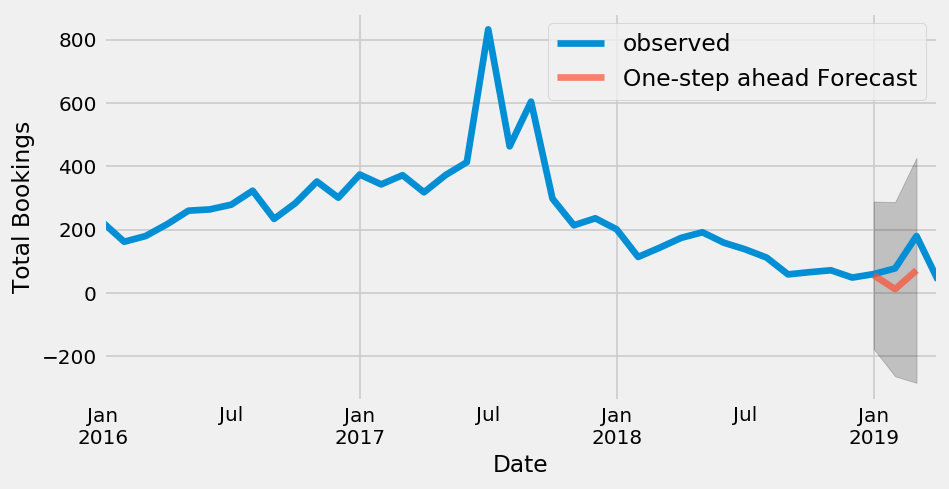

In [82]:
ax = X_Confirm.Total_Bookings['2016-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7,figsize=(8, 4))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Total Bookings')
plt.legend()

plt.show()

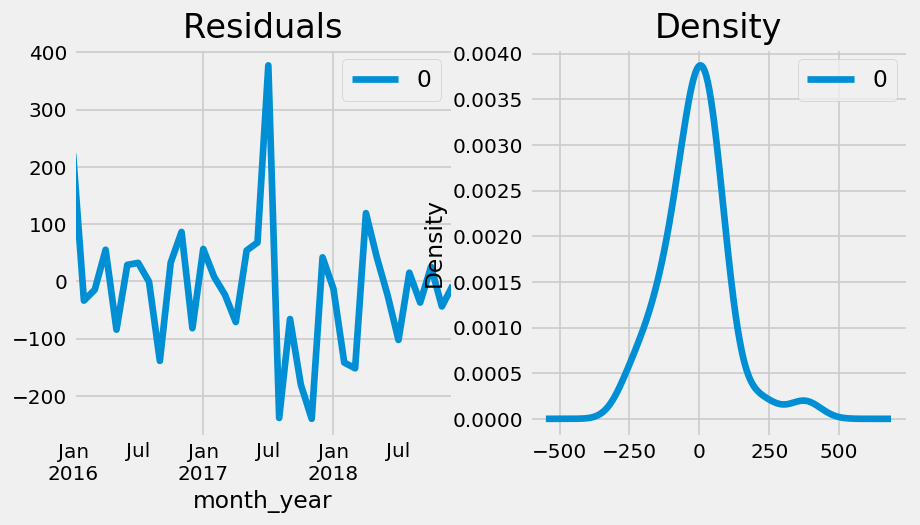

In [83]:
# Plot residual errors
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0],figsize=(8, 4))
residuals.plot(kind='kde', title='Density', ax=ax[1], figsize=(8, 4))
plt.show()

In [96]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
#    acf1 = acf(fc-test)[1] 
#    acf1=acf(s_forecasted['pred_bookings']-s_truth['Total_Bookings'])                     # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(s_forecasted['pred_bookings'],s_truth['Total_Bookings'])

{'corr': -0.341634681844789,
 'mae': 52.380883062821674,
 'mape': 0.38898701456835916,
 'me': -45.7978563508646,
 'minmax': 0.38123450545556103,
 'mpe': -0.279269902702408,
 'rmse': 72.11678426951259}

In [0]:
# Get forecast 5 steps ahead in future
pred_uc = results.get_forecast(steps=5)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

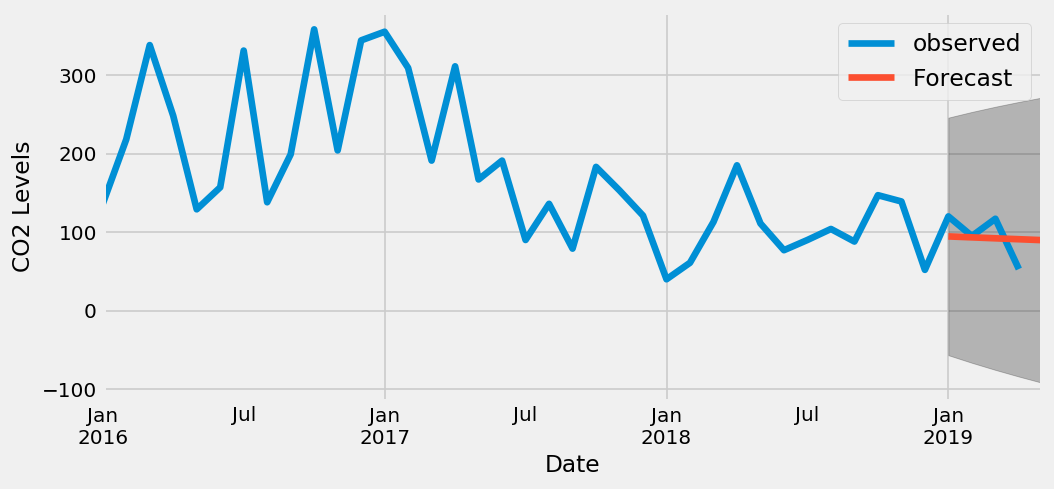

In [75]:
ax = X_Confirm.Total_Bookings.plot(label='observed', figsize=(9, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()